In [4]:
import scipy.io
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import pickle as pk

In [5]:
#Loading the matlab datatset
data = scipy.io.loadmat('MNIST-LeNet5.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'test_fea', 'test_gnd', 'train_fea', 'train_gnd'])


In [6]:
#normalizing the values
training_set = data['train_fea']
training_label = data['train_gnd']
testing_set = data['test_fea']
testing_label = data['test_gnd']

print(training_set.shape)
print(testing_set.shape)
print(training_set[0])
print(training_label[20000])

(60000, 800)
(10000, 800)
[0.00000000e+00 0.00000000e+00 1.13914108e+01 9.25173950e+00
 0.00000000e+00 7.62398148e+00 1.21969185e+01 0.00000000e+00
 0.00000000e+00 1.19466114e+01 8.24071121e+00 5.54221570e-01
 6.72470617e+00 1.25537338e+01 0.00000000e+00 1.20405936e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.06894210e-01 0.00000000e+00 5.04195631e-01 0.00000000e+00
 1.07950732e-01 4.98115838e-01 3.99954706e-01 0.00000000e+00
 6.00802898e-01 5.35062671e-01 2.70651102e-01 4.10784245e+00
 6.77954912e-01 0.00000000e+00 1.79000068e+00 1.09848177e+00
 1.72927916e-01 1.73895156e+00 1.70435774e+00 0.00000000e+00
 0.00000000e+00 2.16961980e+00 1.96589053e+00 0.00000000e+00
 0.00000000e+00 1.93133056e+00 2.97729588e+00 3.10273910e+00
 1.82628131e+00 2.74874163e+00 2.22341847e+00 0.00000000e+00
 4.44853258e+00 1.97241402e+00 1.48138154e+00 0.00000000e+00
 5.03980875e+00 3.73211145e-01 0.00000000e+00 0.00000000e+0

In [7]:
# plt.imshow(training_set[58000][0:800].reshape(28,28), cmap='gray')
# plt.show()

#replace all labels with 10 to 0
training_label[training_label > 9] = 0
testing_label[testing_label > 9] = 0

In [8]:
new_training_set = np.append(training_set, training_label, axis=1)
print(new_training_set[57000])

[0.00000000e+00 9.13468552e+00 3.66793704e+00 0.00000000e+00
 5.62142515e+00 1.13542061e+01 0.00000000e+00 3.68945670e+00
 1.06996870e+01 1.07470016e+01 1.96864474e+00 9.54055595e+00
 2.81203914e+00 0.00000000e+00 1.99138343e+00 2.31482077e+00
 0.00000000e+00 0.00000000e+00 3.77878547e+00 2.85139465e+00
 4.76797484e-02 0.00000000e+00 0.00000000e+00 2.14352989e+00
 2.21324372e+00 5.70278835e+00 1.29499793e+00 0.00000000e+00
 5.20890951e-01 7.85100651e+00 4.96881866e+00 0.00000000e+00
 3.53427947e-01 1.59743452e+00 6.36543608e+00 2.88203526e+00
 5.71817577e-01 1.26913583e+00 1.85124624e+00 7.74695921e+00
 1.13297856e+00 1.29754591e+00 0.00000000e+00 8.66971397e+00
 0.00000000e+00 4.71915913e+00 0.00000000e+00 5.45467257e-01
 3.32354069e+00 3.83545613e+00 7.48802853e+00 0.00000000e+00
 5.76279926e+00 1.07884502e+00 4.65945911e+00 9.33309793e-01
 8.08680725e+00 0.00000000e+00 2.79135871e+00 1.97554302e+00
 3.94073439e+00 0.00000000e+00 3.80242169e-01 0.00000000e+00
 8.76989007e-01 0.000000

In [9]:
#Shuffling the training set and parsin into training and validation
Base = sorted(new_training_set, key=lambda k: random.random())
Base = np.array(Base).reshape(60000, 801)

training = Base[0:55000]
validation = Base[55000:60000]

In [10]:
# print(validation.shape)
validation[0]

array([0.00000000e+00, 0.00000000e+00, 1.26188974e+01, 2.88665414e+00,
       0.00000000e+00, 1.45103037e+00, 6.38162756e+00, 0.00000000e+00,
       6.74327517e+00, 3.46023130e+00, 4.01222229e+00, 0.00000000e+00,
       3.00787115e+00, 7.84461141e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.09039974e-01, 1.31137061e+00, 5.72326279e+00, 8.56371689e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.78052604e+00,
       1.02638113e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.17536712e-01, 7.20105112e-01, 5.18732738e+00, 6.82947445e+00,
       2.05092132e-02, 0.00000000e+00, 0.00000000e+00, 1.31443989e+00,
       0.00000000e+00, 1.07878256e+00, 1.28526831e+00, 6.02704144e+00,
       2.63355136e+00, 7.31752038e-01, 7.91462064e-01, 2.66713786e+00,
       2.26252154e-01, 3.00600791e+00, 5.94714212e+00, 5.69539130e-01,
       1.32417154e+00, 2.84191442e+00, 2.53427482e+00, 0.00000000e+00,
      

In [11]:
#Split into X and y
X = training[:,0:800]

y = training[:,800]

In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier

model = XGBClassifier(verbosity = 2)
model.fit(X, y)

filename = f'XGBOOST_LeNet5'
pk.dump(model, open(filename, 'wb'))

In [12]:
import pickle as pk
file = open('XGBOOST_LeNet5', 'rb')
model = pk.load(file)
file.close()

In [13]:
model.score(validation[:,0:800], validation[:,800])

0.9996

In [14]:
model.score(training[:,0:800], training[:,800])

0.9991818181818182

In [15]:
model.score(testing_set, testing_label)

0.9892

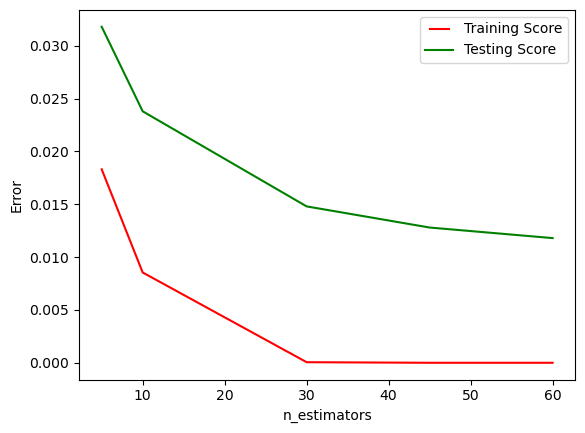

In [17]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [5, 10, 30, 45, 60]

for nb_trees in list_nb_trees:
    modelG = XGBClassifier(n_estimators= nb_trees)
    modelG.fit(X, y)

    train_results.append(1 - (modelG.score(X,y)))
    test_results.append(1 - (modelG.score(testing_set, testing_label)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('n_estimators')
plt.show()

<Figure size 640x480 with 0 Axes>

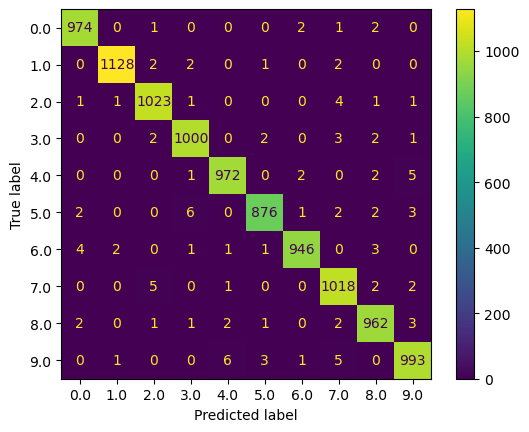

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(testing_set)
cm = confusion_matrix(testing_label, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.savefig('Confusion_matrix', format=None)
disp.plot()
plt.show()